# Loading Data

In [1]:
import os
import numpy as np
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
path = '/content/drive/My Drive/EDA/'

In [4]:
os.listdir(path)

['airbnb.xlsx',
 'pandas_profile.html',
 'airbnb_random.xlsx',
 'pandas_profile.gdoc',
 '3cities_sample_100.csv',
 'visual.ipynb',
 'EDA_0724_전처리.ipynb',
 'airbnb_100.xlsx',
 'Landmarks.xlsx',
 'pairplot.png',
 '박준우 분석',
 'airbnb_top.csv',
 'airbnb_bottom.csv',
 'EDA_top_bottom.ipynb',
 'mulit_reg_of_best_worst.ipynb',
 'mulit_reg_of_best_worst_with_topbottom.ipynb의 사본',
 '발표 준비',
 'visual.ipynb의 사본',
 'EDA_최고최악숙소분석.ipynb']

In [5]:
airbnb = pd.read_excel(os.path.join(path + 'airbnb.xlsx'))

In [6]:
airbnb_copy = airbnb.copy()

In [7]:
print(airbnb.shape)
airbnb.head()

(74111, 29)


,id,log_price,property_type,room_type,amenities,accommodates,bathrooms,bed_type,cancellation_policy,cleaning_fee,city,description,first_review,host_has_profile_pic,host_identity_verified,host_response_rate,host_since,instant_bookable,last_review,latitude,longitude,name,neighbourhood,number_of_reviews,review_scores_rating,thumbnail_url,zipcode,bedrooms,beds
0,6901257,5.010635,Apartment,Entire home/apt,"{""Wireless Internet"",""Air conditioning"",Kitche...",3,1.0,Real Bed,strict,True,NYC,"Beautiful, sunlit brownstone 1-bedroom in the ...",2018-06-16,t,t,NaN,2026-03-12,f,2018-07-16,40.696524,-73.991617,Beautiful brownstone 1-bedroom,Brooklyn Heights,2,100.0,https://a0.muscache.com/im/pictures/6d7cbbf7-c...,11201,1.0,1.0
1,6304928,5.129899,Apartment,Entire home/apt,"{""Wireless Internet"",""Air conditioning"",Kitche...",7,1.0,Real Bed,strict,True,NYC,Enjoy travelling during your stay in Manhattan...,2005-08-17,t,f,1.0,2019-06-17,t,2023-09-17,40.766115,-73.989040,Superb 3BR Apt Located Near Times Square,Hell's Kitchen,6,93.0,https://a0.muscache.com/im/pictures/348a55fe-4...,10019,3.0,3.0
2,7919400,4.976734,Apartment,Entire home/apt,"{TV,""Cable TV"",""Wireless Internet"",""Air condit...",5,1.0,Real Bed,moderate,True,NYC,The Oasis comes complete with a full backyard ...,1930-04-17,t,t,1.0,2025-10-16,t,2014-09-17,40.808110,-73.943756,The Garden Oasis,Harlem,10,92.0,https://a0.muscache.com/im/pictures/6fae5362-9...,10027,1.0,3.0
3,13418779,6.620073,House,Entire home/apt,"{TV,""Cable TV"",Internet,""Wireless Internet"",Ki...",4,1.0,Real Bed,flexible,True,SF,This light-filled home-away-from-home is super...,NaT,t,t,NaN,2019-04-15,f,NaT,37.772004,-122.431619,Beautiful Flat in the Heart of SF!,Lower Haight,0,NaN,https://a0.muscache.com/im/pictures/72208dad-9...,94117,2.0,2.0
4,3808709,4.744932,Apartment,Entire home/apt,"{TV,Internet,""Wireless Internet"",""Air conditio...",2,1.0,Real Bed,moderate,True,DC,"Cool, cozy, and comfortable studio located in ...",2012-05-15,t,t,1.0,2001-03-15,t,2022-01-17,38.925627,-77.034596,Great studio in midtown DC,Columbia Heights,4,40.0,NaN,20009,0.0,1.0


In [8]:
airbnb.dtypes

id                                 int64
log_price                        float64
property_type                     object
room_type                         object
amenities                         object
accommodates                       int64
bathrooms                        float64
bed_type                          object
cancellation_policy               object
cleaning_fee                        bool
city                              object
description                       object
first_review              datetime64[ns]
host_has_profile_pic              object
host_identity_verified            object
host_response_rate               float64
host_since                datetime64[ns]
instant_bookable                  object
last_review               datetime64[ns]
latitude                         float64
longitude                        float64
name                              object
neighbourhood                     object
number_of_reviews                  int64
review_scores_ra

In [9]:
airbnb.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 74111 entries, 0 to 74110
Data columns (total 29 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   id                      74111 non-null  int64         
 1   log_price               74111 non-null  float64       
 2   property_type           74111 non-null  object        
 3   room_type               74111 non-null  object        
 4   amenities               74111 non-null  object        
 5   accommodates            74111 non-null  int64         
 6   bathrooms               73911 non-null  float64       
 7   bed_type                74111 non-null  object        
 8   cancellation_policy     74111 non-null  object        
 9   cleaning_fee            74111 non-null  bool          
 10  city                    74111 non-null  object        
 11  description             74105 non-null  object        
 12  first_review            58247 non-null  dateti

In [10]:
airbnb.describe() # continuous variables

,id,log_price,accommodates,bathrooms,host_response_rate,latitude,longitude,number_of_reviews,review_scores_rating,bedrooms,beds
count,7.411100e+04,74111.000000,74111.000000,73911.000000,55812.000000,74111.000000,74111.000000,74111.000000,57389.000000,74020.000000,73980.000000
mean,1.126662e+07,4.782069,3.155146,1.235263,0.943520,38.445958,-92.397525,20.900568,94.067365,1.265793,1.710868
std,6.081735e+06,0.717394,2.153589,0.582044,0.163418,3.080167,21.705322,37.828641,7.836556,0.852143,1.254142
min,3.440000e+02,0.000000,1.000000,0.000000,0.000000,33.338905,-122.511500,0.000000,20.000000,0.000000,0.000000
25%,6.261964e+06,4.317488,2.000000,1.000000,1.000000,34.127908,-118.342374,1.000000,92.000000,1.000000,1.000000
50%,1.225415e+07,4.709530,2.000000,1.000000,1.000000,40.662138,-76.996965,6.000000,96.000000,1.000000,1.000000
75%,1.640226e+07,5.220356,4.000000,1.000000,1.000000,40.746096,-73.954660,23.000000,100.000000,1.000000,2.000000
max,2.123090e+07,7.600402,16.000000,8.000000,1.000000,42.390437,-70.985047,605.000000,100.000000,10.000000,18.000000


In [11]:
airbnb.duplicated().sum()
# airbnb.drop_duplicates(inplace=True)

0

In [12]:
airbnb.isnull().sum()

id                            0
log_price                     0
property_type                 0
room_type                     0
amenities                     0
accommodates                  0
bathrooms                   200
bed_type                      0
cancellation_policy           0
cleaning_fee                  0
city                          0
description                   6
first_review              15864
host_has_profile_pic        188
host_identity_verified      188
host_response_rate        18299
host_since                  188
instant_bookable              0
last_review               15827
latitude                      0
longitude                     0
name                         13
neighbourhood              6872
number_of_reviews             0
review_scores_rating      16722
thumbnail_url              8216
zipcode                     966
bedrooms                     91
beds                        131
dtype: int64

# Preprocessing

## Drop unnecessary columns

In [13]:
airbnb.drop(['id','amenities','first_review','last_review','host_since','name','thumbnail_url','zipcode'], axis=1, inplace=True)

## Missing value

결측치 처리 전, review_scores_rating NA 값 저장 (혹시 나중에 쓰일까봐)

In [14]:
review_rating_predict = airbnb[airbnb['review_scores_rating'].isnull()]
review_rating_predict.head(3)

,log_price,property_type,room_type,accommodates,bathrooms,bed_type,cancellation_policy,cleaning_fee,city,description,host_has_profile_pic,host_identity_verified,host_response_rate,instant_bookable,latitude,longitude,neighbourhood,number_of_reviews,review_scores_rating,bedrooms,beds
3,6.620073,House,Entire home/apt,4,1.0,Real Bed,flexible,True,SF,This light-filled home-away-from-home is super...,t,t,NaN,f,37.772004,-122.431619,Lower Haight,0,NaN,2.0,2.0
12,4.248495,Apartment,Private room,2,1.0,Real Bed,flexible,True,LA,Newly furnished room in beach apartment one st...,t,f,NaN,f,33.813228,-118.389434,Torrance,0,NaN,1.0,1.0
15,4.094345,Apartment,Private room,2,1.5,Real Bed,moderate,True,Chicago,Just west of vibrant Wicker Park and Ukranian ...,t,t,1.0,f,41.908240,-87.695242,Humboldt Park,0,NaN,1.0,1.0


bathrooms, bedrooms, beds 결측치 $\rightarrow$ 0으로 또는 버리기


In [15]:
# Replace NA -> zero
#airbnb.fillna({'bathrooms':0}, inplace=True)
#airbnb.fillna({'bedrooms':0}, inplace=True)
#airbnb.fillna({'beds':0}, inplace=True)

host 관련 결측치 $\rightarrow$ False로 또는 버리기

In [16]:
# Replace NA -> False
#

In [17]:
airbnb.isnull().sum()

log_price                     0
property_type                 0
room_type                     0
accommodates                  0
bathrooms                   200
bed_type                      0
cancellation_policy           0
cleaning_fee                  0
city                          0
description                   6
host_has_profile_pic        188
host_identity_verified      188
host_response_rate        18299
instant_bookable              0
latitude                      0
longitude                     0
neighbourhood              6872
number_of_reviews             0
review_scores_rating      16722
bedrooms                     91
beds                        131
dtype: int64

description, host_response_rate, neighbourhood, reveiw_scores_rating 결측치 버리기
* 총 43,295 건 남음

In [18]:
airbnb_dropna = airbnb.dropna(how='any')
airbnb_dropna.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 43092 entries, 1 to 74110
Data columns (total 21 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   log_price               43092 non-null  float64
 1   property_type           43092 non-null  object 
 2   room_type               43092 non-null  object 
 3   accommodates            43092 non-null  int64  
 4   bathrooms               43092 non-null  float64
 5   bed_type                43092 non-null  object 
 6   cancellation_policy     43092 non-null  object 
 7   cleaning_fee            43092 non-null  bool   
 8   city                    43092 non-null  object 
 9   description             43092 non-null  object 
 10  host_has_profile_pic    43092 non-null  object 
 11  host_identity_verified  43092 non-null  object 
 12  host_response_rate      43092 non-null  float64
 13  instant_bookable        43092 non-null  object 
 14  latitude                43092 non-null

In [35]:
airbnb_dropna.to_csv('/content/drive/MyDrive/EDA/airbnb_eda.csv')

In [19]:
# airbnb[['property_type', 'room_type']] = airbnb[['property_type', 'room_type']].astype('category')

## 리뷰가 일정 수준 이상 있는 경우만 남기기

In [20]:
# airbnb_10 = airbnb[airbnb['number_of_reviews']>=10]
# airbnb_20 = airbnb[airbnb['number_of_reviews']>=20]
# print(airbnb_10.shape)
# print(airbnb_20.shape)

In [21]:
airbnb_10 = airbnb_dropna[airbnb_dropna['number_of_reviews']>=10]
airbnb_20 = airbnb_dropna[airbnb_dropna['number_of_reviews']>=20]
print(airbnb_10.shape)
print(airbnb_20.shape)

(26001, 21)
(18446, 21)


In [22]:
airbnb_10 = airbnb_10.reset_index(drop=True)

# "city" 별 가격 차이

In [23]:
city1 = airbnb_10.loc[airbnb_10['city'] == 'NYC']
price_city1 = city1[['log_price']]

city2 = airbnb_10.loc[airbnb_10['city'] == 'LA']
price_city2 = city2[['log_price']]

city3 = airbnb_10.loc[airbnb_10['city'] == 'SF']
price_city3 = city3[['log_price']]

city4 = airbnb_10.loc[airbnb_10['city'] == 'DC']
price_city4 = city4[['log_price']]

city5 = airbnb_10.loc[airbnb_10['city'] == 'Chicago']
price_city5 = city5[['log_price']]

city6 = airbnb_10.loc[airbnb_10['city'] == 'Boston']
price_city6 = city6[['log_price']]

In [24]:
#setting figure size for future visualizations
sns.set(rc={'figure.figsize':(10,8)})
sns.set_style('white')

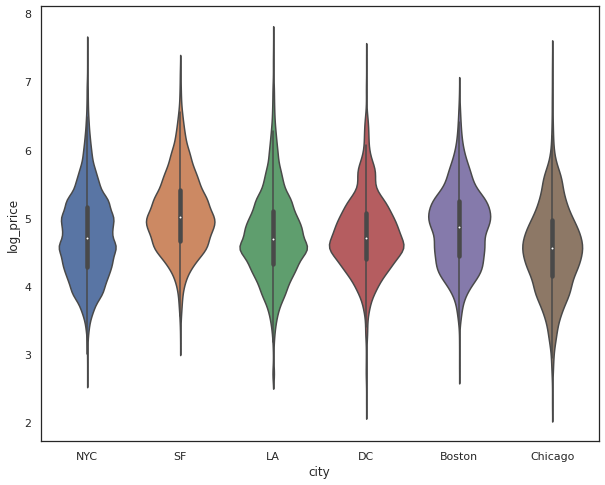

In [25]:
sns.violinplot(data=airbnb_10, x='city', y='log_price')
plt.show()

* range
* most expensive or the cheapest
등 파악 가능

# Location

## Landmark

"neighbourhood" 변수 : 유명명소 목록

In [26]:
print(len(airbnb['neighbourhood'].unique()))
airbnb['neighbourhood'].unique()

620


array(['Brooklyn Heights', "Hell's Kitchen", 'Harlem', 'Lower Haight',
       'Columbia Heights', 'Noe Valley', nan, 'Downtown',
       'Richmond District', 'Alphabet City', 'Hermosa Beach', 'Torrance',
       'U Street Corridor', 'Humboldt Park', 'Wicker Park',
       'South Boston', 'Lower East Side', 'Flatbush', 'Sherman Oaks',
       'East Flatbush', 'Valley Glen', 'Dupont Circle', 'Jamaica',
       'Forest Hills', 'Murray Hill', 'Lefferts Garden', 'Mid-Wilshire',
       'Venice', 'West Hollywood', 'Brownsville', 'Williamsburg',
       'East Village', 'South Loop/Printers Row', 'Westlake',
       'Hollywood Hills', 'Upper East Side', 'Bushwick',
       'Bedford-Stuyvesant', 'Pilsen', 'Chelsea', 'Sunnyside',
       'Greenwich Village', 'Washington Heights', 'Pasadena',
       'Potrero Hill', 'Brookland', 'Los Feliz', 'Hollywood',
       'Midtown East', 'Glendale', 'Park Slope', 'Arcadia',
       'West Village', 'Astoria', 'Portola', 'Burbank', 'East Harlem',
       'Silver Lake', 'H

## 위도 경도 시각화

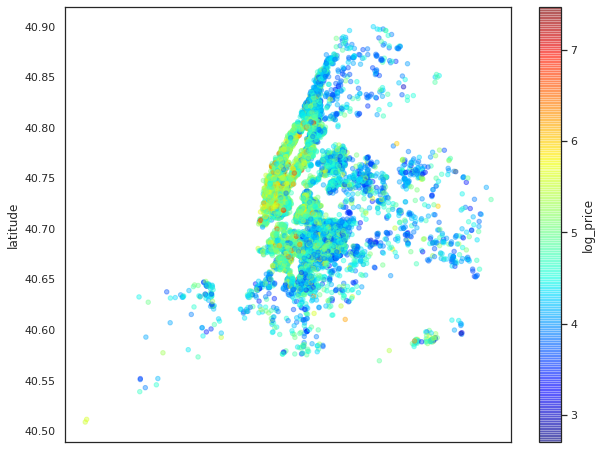

In [27]:
# 예시로 NYC 만
city1.plot(kind='scatter', x='longitude', y='latitude', c='log_price',
           cmap=plt.get_cmap('jet'), colorbar=True, alpha=0.4, figsize=(10,8))

plt.show()

**샘플 뽑기**

In [28]:
#airbnb_dropna = airbnb_dropna.reset_index(drop=True)
citynyc = airbnb_dropna.loc[airbnb_dropna['city'] == 'NYC']
cityla  = airbnb_dropna.loc[airbnb_dropna['city'] == 'LA']
citysf  = airbnb_dropna.loc[airbnb_dropna['city'] == 'SF']

In [29]:
#리뷰수가 20 이상인 친구들에서 샘플을 뽑기 위한 데이터 
# 이때 20을 수정하셔도 좋을 것 같습니다 ! 회의에서 나왔던 것처럼 좀 더 높은 값으로요 !
airbnb_20 = airbnb[airbnb['number_of_reviews']>=20]
#airbnb_20 = airbnb_20.reset_index(drop=True)
citynyc_reviewupto20= airbnb_20.loc[airbnb_20['city'] == 'NYC']
cityla_reviewupto20 = airbnb_20.loc[airbnb_20['city'] == 'LA']
citysf_reviewupto20 = airbnb_20.loc[airbnb_20['city'] == 'SF']

#저희가 id 대신 인덱스를 쓰기로 하여서, reset index는 필요가 없을 것 같아 일단 코드는 추가하되, 주석처리 하였습니다!
# 이 부분에서 의견 주시면 감사하겠습니다

In [30]:
#가중치 두지 않고 샘플 뽑기 # dropna 파일에서

citynyc_sample = citynyc.sample(n= 100, replace = False , random_state= 1004) #시티별로 100개의 샘플을 뽑는 것으로 하였는데 시각화 하시는 분들이 조정하셔도 좋을 것 같습니다
cityla_sample = cityla.sample(n= 100, replace = False , random_state= 1004) #시드 역시 임의로 1004로 주었는데 다른 값으로 수정하셔도괜찮습니다 ! 
citysf_sample = citysf.sample(n= 100, replace = False , random_state= 1004) 

citysf_sample

#citynyc_sample.reset_index(drop=True)
#cityla_sample.reset_index(drop=True) 인덱스를 다시 1로 만들 필요는 없을 것 같아 주석 처리했지만 혹시 필요하시면 사용하시라고 올립니다!
#citysf_sample.reset_index(drop=True)

,log_price,property_type,room_type,accommodates,bathrooms,bed_type,cancellation_policy,cleaning_fee,city,description,host_has_profile_pic,host_identity_verified,host_response_rate,instant_bookable,latitude,longitude,neighbourhood,number_of_reviews,review_scores_rating,bedrooms,beds
44920,5.135798,Apartment,Entire home/apt,3,1.0,Real Bed,strict,True,SF,Our spacious and private garden studio is loca...,t,t,1.0,f,37.759899,-122.407810,Mission District,166,98.0,0.0,3.0
65603,4.454347,Apartment,Private room,1,1.0,Real Bed,moderate,True,SF,"The best of urban life: sunlit filled condo, s...",t,t,1.0,f,37.750175,-122.404682,Mission District,58,98.0,1.0,1.0
21092,5.298317,House,Entire home/apt,6,2.0,Real Bed,strict,True,SF,Live blocks away from Golden Gate Park in a hu...,t,t,1.0,f,37.779588,-122.495081,Richmond District,31,92.0,3.0,4.0
55427,5.068904,House,Private room,2,1.0,Real Bed,flexible,True,SF,For Oracle OpenWorld and JavaOne attendees Oct...,t,t,1.0,f,37.752535,-122.451150,Twin Peaks,37,99.0,1.0,1.0
49632,5.926926,Condominium,Entire home/apt,6,2.0,Real Bed,strict,True,SF,If you're visiting San Francisco for the Hardl...,t,t,1.0,f,37.783066,-122.486047,Richmond District,4,100.0,3.0,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
57973,4.941642,Timeshare,Entire home/apt,4,1.0,Real Bed,strict,False,SF,The Suites at Fisherman's Wharf offers large a...,t,f,1.0,f,37.806025,-122.419832,Fisherman's Wharf,8,95.0,1.0,2.0
7150,5.521461,Apartment,Entire home/apt,3,1.0,Real Bed,moderate,True,SF,"Spacious 2 bedroom full-floor apartment, on a ...",t,t,1.0,f,37.761497,-122.428530,The Castro,15,94.0,2.0,1.0
33294,5.652489,Apartment,Entire home/apt,4,1.0,Real Bed,moderate,True,SF,My place is in the most sunniest and sought af...,t,f,1.0,f,37.762074,-122.404560,Potrero Hill,19,99.0,1.0,2.0
14394,5.501258,House,Entire home/apt,4,1.5,Real Bed,strict,True,SF,"Originally built in the 1915 as a horse barn, ...",t,t,1.0,f,37.744497,-122.427180,Noe Valley,92,99.0,2.0,3.0


In [31]:
threecities_sample_100 = pd.concat([citynyc_sample,cityla_sample,citysf_sample])
threecities_sample_100.to_csv('/content/drive/My Drive/EDA/3cities_sample_100.csv')

In [32]:
#dropna 파일에서 가중치 두고 뽑기


citynyc_sample_w = citynyc.sample(n= 100, replace = False , random_state= 1004, weights= 'number_of_reviews' ) #시티별로 100개의 샘플을 뽀ㅃ는 것으로 하였는데 시각화 하시는 분들이 조정하셔도 좋을 것 같습니다
cityla_sample_w = cityla.sample(n= 100, replace = False , random_state= 1004,weights= 'number_of_reviews' )
citysf_sample_w = citysf.sample(n= 100, replace = False , random_state= 1004,weights= 'number_of_reviews' ) 

citysf_sample_w

#citynyc_sample_w.reset_index(drop=True)
#cityla_sample_w.reset_index(drop=True) 인덱스를 다시 1로 만들 필요는 없을 것 같아 주석 처리했지만 혹시 필요하시면 사용하시라고 올립니다!
#citysf_sample_w.reset_index(drop=True)

,log_price,property_type,room_type,accommodates,bathrooms,bed_type,cancellation_policy,cleaning_fee,city,description,host_has_profile_pic,host_identity_verified,host_response_rate,instant_bookable,latitude,longitude,neighbourhood,number_of_reviews,review_scores_rating,bedrooms,beds
2301,4.700480,Guest suite,Private room,2,1.0,Real Bed,moderate,True,SF,"Located in a pretty Bernal Heights home, this ...",t,t,1.0,f,37.746671,-122.407682,Bernal Heights,54,97.0,1.0,1.0
63255,4.382027,House,Private room,2,1.0,Real Bed,moderate,False,SF,Private room in house in Bernal Heights. Two b...,t,t,1.0,f,37.738157,-122.416109,Bernal Heights,34,92.0,1.0,1.0
54351,5.703782,Apartment,Entire home/apt,4,1.0,Real Bed,moderate,True,SF,Spacious 2 Bedroom flat in the heart of NOPA -...,t,t,0.9,f,37.777361,-122.436100,Alamo Square,40,92.0,2.0,2.0
63699,4.317488,Apartment,Shared room,1,1.0,Futon,moderate,True,SF,Super comfortable full sized futon in our loft...,t,t,1.0,t,37.764332,-122.436643,The Castro,280,98.0,1.0,1.0
40733,4.442651,Apartment,Private room,2,1.0,Real Bed,flexible,False,SF,Sunny apt in a great corner of the Mission. Y...,t,t,1.0,f,37.748749,-122.419951,Mission District,79,95.0,1.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
57575,5.347108,Apartment,Entire home/apt,6,1.0,Real Bed,strict,True,SF,a lovely tree-lined st.This beautiful apartmen...,t,t,1.0,t,37.759717,-122.421643,Mission District,124,94.0,2.0,5.0
4916,4.762174,Apartment,Private room,2,1.0,Real Bed,moderate,True,SF,Private room in spacious & comfortable shared ...,t,t,1.0,t,37.759024,-122.444089,The Castro,144,98.0,1.0,1.0
62981,4.976734,Apartment,Private room,2,1.5,Real Bed,strict,True,SF,This quiet and spacious room is in a flat in a...,t,t,1.0,t,37.767227,-122.437682,Haight-Ashbury,185,97.0,1.0,1.0
25022,5.068904,Apartment,Entire home/apt,2,1.0,Real Bed,strict,True,SF,"Charming, comfortable apartment with access to...",t,t,1.0,f,37.806084,-122.440870,Marina,117,89.0,1.0,1.0


In [33]:
#리뷰수 20개 이상인 것에서 랜덤으로 뽑기

citynyc_sample_review = citynyc_reviewupto20.sample(n= 100, replace = False , random_state= 1004)
cityla_sample_review = cityla_reviewupto20.sample(n= 100, replace = False , random_state= 1004)
citysf_sample_review = citysf_reviewupto20.sample(n= 100, replace = False , random_state= 1004) 

citysf_sample_review

#citynyc_sample_review.reset_index(drop=True)
#cityla_sample_review.reset_index(drop=True) 
#citysf_sample_review.reset_index(drop=True)

,log_price,property_type,room_type,accommodates,bathrooms,bed_type,cancellation_policy,cleaning_fee,city,description,host_has_profile_pic,host_identity_verified,host_response_rate,instant_bookable,latitude,longitude,neighbourhood,number_of_reviews,review_scores_rating,bedrooms,beds
34170,4.859812,Apartment,Private room,2,1.0,Real Bed,moderate,True,SF,"Our place is close to Golden Gate Park, the Ma...",t,t,1.0,f,37.776785,-122.461263,Richmond District,36,99.0,1.0,1.0
72289,5.105945,Apartment,Entire home/apt,2,1.0,Real Bed,moderate,True,SF,Great Location in hip Bernal Heights with stun...,t,t,1.0,t,37.745088,-122.416113,Bernal Heights,52,98.0,1.0,1.0
44354,5.192957,Apartment,Private room,1,1.0,Airbed,strict,True,SF,Welcome to our clean comfortable modern 2 bedr...,t,f,1.0,t,37.777858,-122.411776,SoMa,31,97.0,1.0,1.0
27244,5.298317,Apartment,Entire home/apt,2,1.0,Real Bed,strict,True,SF,"Tons of natural light, gorgeous hardwood floor...",t,f,1.0,f,37.761482,-122.409254,Mission District,21,98.0,1.0,1.0
28377,5.521461,House,Entire home/apt,4,1.0,Real Bed,strict,True,SF,"Two private connecting Bedrooms, and private l...",t,t,1.0,t,37.778947,-122.440143,Western Addition/NOPA,38,96.0,2.0,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41465,5.298317,House,Entire home/apt,5,1.0,Real Bed,strict,True,SF,"This sunny, centrally located 2bd/1bth home ha...",t,t,1.0,f,37.730854,-122.439032,Sunnyside,22,96.0,2.0,2.0
59852,4.976734,Apartment,Entire home/apt,2,1.0,Real Bed,strict,True,SF,Charming 1bd/1b apartment in Noe Valley has a ...,t,f,NaN,t,37.751437,-122.442737,Noe Valley,53,87.0,1.0,1.0
952,5.433722,Apartment,Entire home/apt,4,1.0,Real Bed,strict,True,SF,The Donatello is a hotel/timeshare and is one ...,t,t,1.0,f,37.788355,-122.409157,Downtown,31,96.0,0.0,2.0
35036,5.517453,Loft,Entire home/apt,2,1.5,Real Bed,moderate,False,SF,I designed this Artist's Studio/loft in a SF V...,t,t,1.0,f,37.783294,-122.445175,Western Addition/NOPA,24,95.0,2.0,1.0


In [34]:
#리뷰수 20 이상에서 가중치 두고 뽑기

citynyc_sample_review_w = citynyc_reviewupto20.sample(n= 100, replace = False , random_state= 1004,weights= 'number_of_reviews')
cityla_sample_review_w = cityla_reviewupto20.sample(n= 100, replace = False , random_state= 1004,weights= 'number_of_reviews')
citysf_sample_review_w = citysf_reviewupto20.sample(n= 100, replace = False , random_state= 1004,weights= 'number_of_reviews') 

citysf_sample_review_w

#citynyc_sample_review_w.reset_index(drop=True)
#cityla_sample_review_w.reset_index(drop=True) 
#citysf_sample_review_w.reset_index(drop=True)

,log_price,property_type,room_type,accommodates,bathrooms,bed_type,cancellation_policy,cleaning_fee,city,description,host_has_profile_pic,host_identity_verified,host_response_rate,instant_bookable,latitude,longitude,neighbourhood,number_of_reviews,review_scores_rating,bedrooms,beds
2302,4.990433,Apartment,Entire home/apt,2,1.0,Real Bed,strict,True,SF,Our garden-view studio/suite has all the moder...,t,t,1.0,f,37.740700,-122.451800,Sunnyside,54,97.0,0.0,1.0
63191,5.010635,Apartment,Entire home/apt,3,1.0,Real Bed,moderate,True,SF,SAN FRANCISCO SHORT-TERM RESIDENTIAL REGISTRAT...,t,f,1.0,t,37.738533,-122.471659,Parkside,317,96.0,1.0,2.0
54023,4.828314,House,Private room,2,1.0,Real Bed,moderate,True,SF,"Bed and bath in exclusive SF neighborhood, nea...",t,t,1.0,f,37.766481,-122.445420,Haight-Ashbury,164,91.0,1.0,1.0
63699,4.317488,Apartment,Shared room,1,1.0,Futon,moderate,True,SF,Super comfortable full sized futon in our loft...,t,t,1.0,t,37.764332,-122.436643,The Castro,280,98.0,1.0,1.0
40493,4.382027,House,Private room,2,2.0,Real Bed,flexible,True,SF,1) 15 mins from/to SFO airport by Subway or Ca...,t,t,1.0,t,37.708552,-122.465725,Crocker Amazon,59,92.0,1.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
57496,5.521461,House,Entire home/apt,4,1.0,Real Bed,strict,True,SF,Enjoy Brazilian hospitality at Clebia's Place ...,t,t,1.0,f,37.760549,-122.404022,Potrero Hill,66,92.0,2.0,2.0
4916,4.762174,Apartment,Private room,2,1.0,Real Bed,moderate,True,SF,Private room in spacious & comfortable shared ...,t,t,1.0,t,37.759024,-122.444089,The Castro,144,98.0,1.0,1.0
62867,4.499810,Apartment,Private room,2,1.5,Pull-out Sofa,moderate,True,SF,The large front room of a 1898 Victorian flat...,t,t,1.0,t,37.777787,-122.437754,Alamo Square,259,97.0,1.0,1.0
24800,4.867534,Apartment,Entire home/apt,2,1.0,Real Bed,strict,False,SF,STR-027 Private room with comfortable queen be...,t,t,1.0,f,37.774313,-122.452362,Western Addition/NOPA,273,98.0,1.0,1.0
